The objective of this notebook is to create and analyse a market by segmenting the customer dataset using k-means Clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.drop(["CustomerID"], axis = 1, inplace=True) #Dropping CustomerID

In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

**Analysis:**

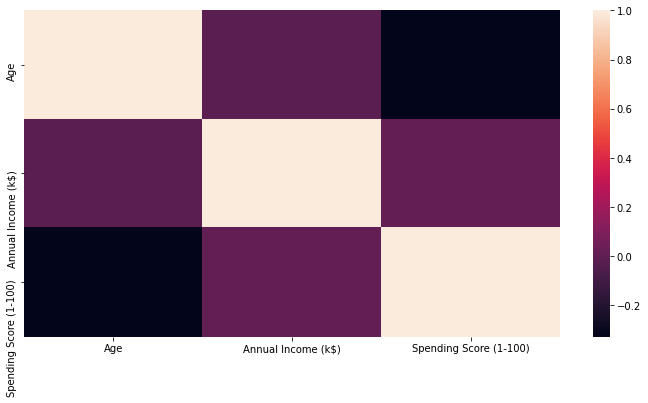

In [8]:
figure = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),data = df)

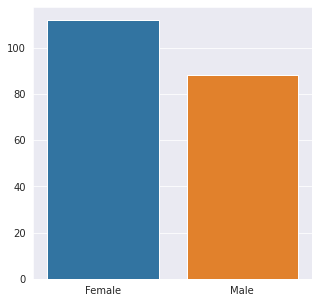

In [9]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

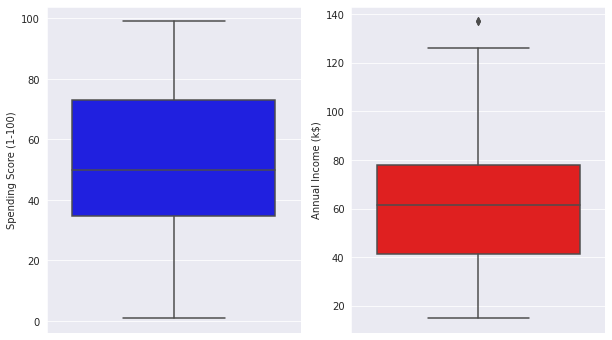

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="blue")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],color="red")
plt.show()

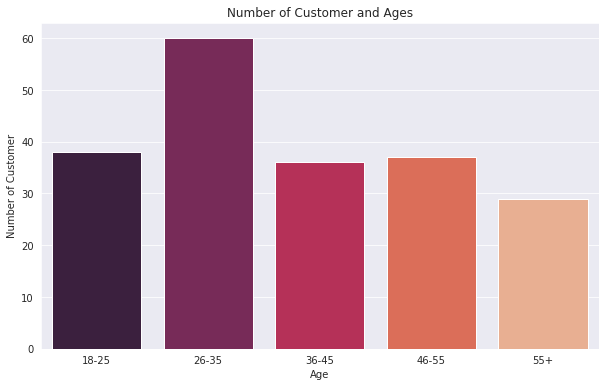

In [12]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

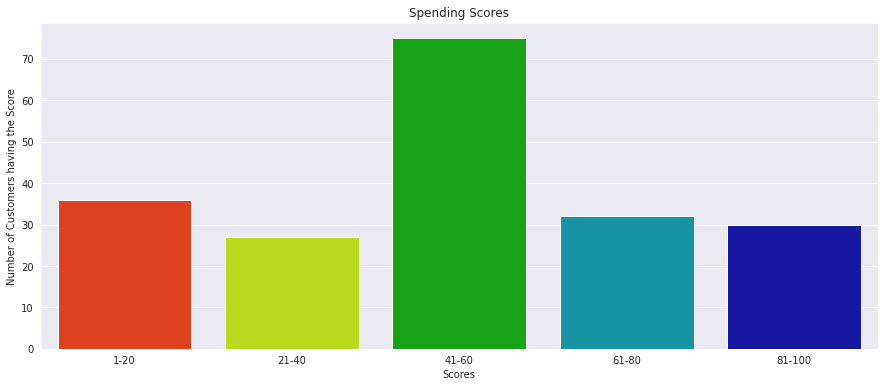

In [15]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Scores")
plt.ylabel("Number of Customers having the Score")
plt.show()

Building the Model:

In [17]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Using elbow method to get the best possible value for number of clusters:

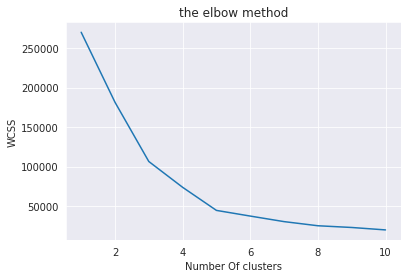

In [18]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state = 2)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.figure()
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number Of clusters')
plt.ylabel('WCSS')
plt.show()

Best Value, according to the graph above, is 5.

In [19]:
km = KMeans(n_clusters = 5 , random_state = 2)
y_kmeans = km.fit_predict(X)

In [20]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

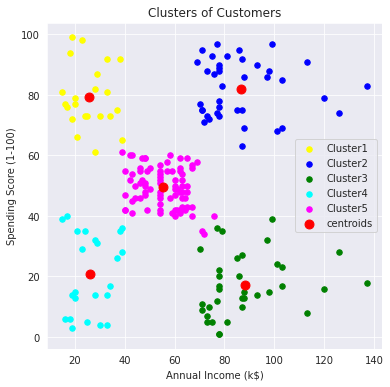

In [21]:
plt.figure(figsize = (6,6))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s = 30, c = 'yellow', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s = 30, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s = 30, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1],s = 30, c = 'cyan', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1],s = 30, c = 'magenta', label = 'Cluster5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s = 80,c ='red',label = 'centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()